<a href="https://colab.research.google.com/github/codegod1202/MiniProjectt/blob/main/mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [84]:
from google.colab import files

uploaded = files.upload()



Saving The-original-Shepp-Logan-phantom-image.png to The-original-Shepp-Logan-phantom-image.png


In [85]:
# Get the file name of the uploaded image
file_name = next(iter(uploaded))

# Read the uploaded image using OpenCV
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

In [86]:
image.shape

(474, 473)

In [90]:
rotation_angle = 5  # Rotation angle in degrees
num_angles = 360
num_detectors = min(image.shape)
max_distance = int(np.ceil(np.sqrt(2) * max(image.shape)))

print(num_detectors)
print(max_distance)


473
671


In [91]:
# Initialize sinogram
sinogram = np.zeros((num_detectors, num_angles))
sinogram


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [92]:
# Forward projection
for angle in range(num_angles):
    rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]), flags=cv2.INTER_LINEAR)
    for detector in range(num_detectors):
        for i in range(image.shape[0]):
            j = int(np.clip(detector - max_distance * np.cos(np.deg2rad(angle)), 0, num_detectors - 1))
            sinogram[detector, angle] += rotated_image[i, j]

In [93]:
sinogram.shape

(473, 360)

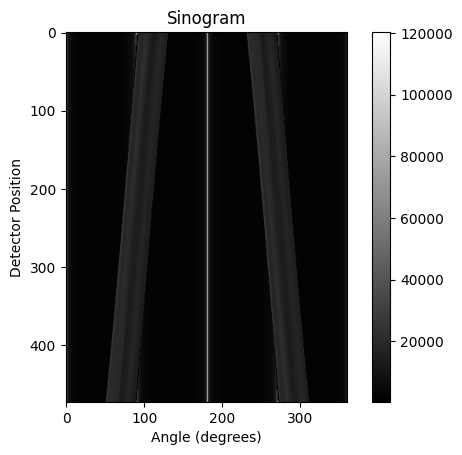

In [94]:
# Display the sinogram
plt.imshow(sinogram, cmap='gray')
plt.title('Sinogram')
plt.xlabel('Angle (degrees)')
plt.ylabel('Detector Position')
plt.colorbar()
plt.show()

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import cv2




In [98]:
# Load the sinogram (you can use the sinogram generated in the previous step)
# For simplicity, let's assume 'sinogram' contains the sinogram data

# Define parameters
num_angles = sinogram.shape[1]
num_detectors = sinogram.shape[0]
image_size = min(image.shape)
max_distance = int(np.ceil(np.sqrt(2) * image_size))

print(num_angles)
print(num_detectors)
print(image_size)
print(max_distance)

360
473
473
669


In [99]:
# Initialize reconstructed image
reconstructed_image = np.zeros((image_size, image_size))



In [100]:
# Feldkamp-Davis-Kress (FDK) reconstruction
for angle in range(num_angles):
    theta = np.deg2rad(angle)
    for i in range(image_size):
        for j in range(image_size):
            x = j - image_size / 2
            y = image_size / 2 - i
            s = x * np.cos(theta) + y * np.sin(theta)
            s_mid = num_detectors / 2
            s_prime = s + s_mid
            detector_index = int(np.floor(s_prime))
            if 0 <= detector_index < num_detectors - 1:
                delta_s = s_prime - detector_index
                reconstructed_image[i, j] += (1 - delta_s) * sinogram[detector_index, angle] + delta_s * sinogram[detector_index + 1, angle]



In [101]:
new_image = reconstructed_image

In [102]:
print(reconstructed_image.shape)


(473, 473)


In [103]:
reconstructed_image_resized = cv2.resize(reconstructed_image, (image.shape[1], image.shape[0]))

In [104]:
reconstructed_image_resized.shape

(474, 473)

In [105]:
# Normalize the reconstructed image
reconstructed_image_resized /= (num_angles)
reconstructed_image_resized.shape


(474, 473)

In [106]:
print(image.shape)
print(reconstructed_image_resized.shape)

(474, 473)
(474, 473)


In [107]:
# Calculate the error between the original and reconstructed images
error = np.sqrt(np.mean((image.astype(float) - reconstructed_image_resized)**2))
error


6181.57676068677

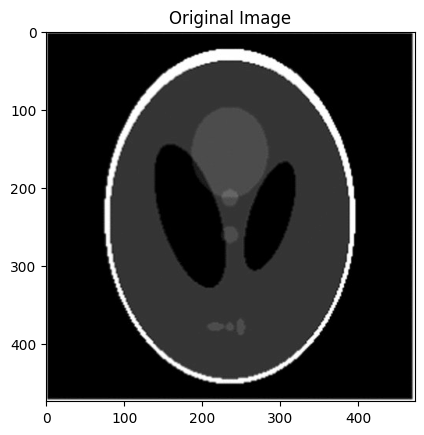

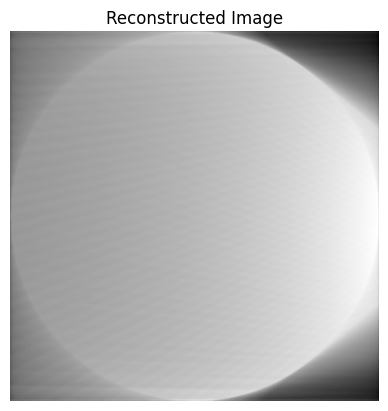

Root Mean Square Error (RMSE): 6181.57676068677


In [108]:
# Display the reconstructed image
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.show()
print()
plt.imshow(reconstructed_image_resized, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()

print(f"Root Mean Square Error (RMSE): {error}")